## Introduction to Data Science

### Introduction to Visualization Tools

In [38]:
import os
import sys
import pathlib

import pandas as pd
import numpy as np

## Data Visualization


[Examples of Stuning Data Visualizations](https://towardsdatascience.com/15-stunning-data-visualizations-and-what-you-can-learn-from-them-fc5b78f21fb8)

### [Matplotlib](http://matplotlib.org/users/pyplot_tutorial.html):  

matplotlib.pyplot is a collection of command style functions that make matplotlib work like MATLAB. Each pyplot function makes some change to a figure: e.g., creates a figure, creates a plotting area in a figure, plots some lines in a plotting area, decorates the plot with labels, etc.  

In matplotlib.pyplot various states are preserved across function calls, so that it keeps track of things like the current figure and plotting area, and the plotting functions are directed to the current axes (please note that “axes” here and in most places in the documentation refers to the axes part of a figure and not the strict mathematical term for more than one axis).  

In [2]:
import matplotlib.pyplot as plt

%matplotlib inline
#%matplotlib notebook

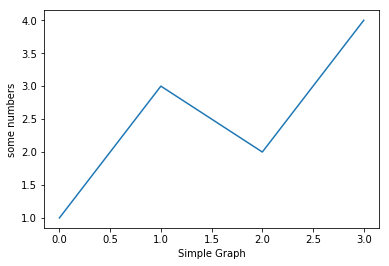

In [3]:
plt.plot([1,3,2,4])
plt.ylabel('some numbers')
plt.xlabel('Simple Graph')
#plt.axis([0,10,0,20])
plt.show()

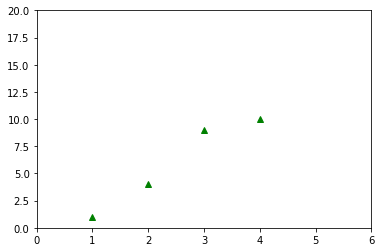

In [4]:
plt.plot([1,2,3,4], [1,4,9,10], 'g^')
plt.axis([0, 6, 0, 20])
plt.show()

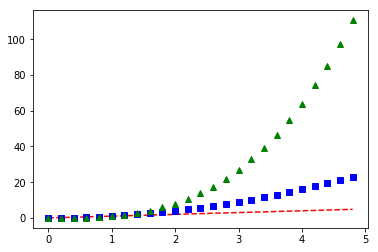

In [5]:
# evenly sampled time at 200ms intervals
t = np.arange(0., 5., 0.2)

# red dashes, blue squares and green triangles
plt.plot(t, t, 'r--')
plt.plot(t, t**2, 'bs')
plt.plot(t, t**3, 'g^')
#plt.plot(t, t, 'r--', t, t**2, 'bs', t, t**3, 'g^') #all at the same time

plt.show()

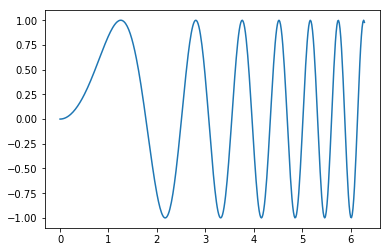

In [6]:
x = np.linspace(0, 2 * np.pi, 400)
y = np.sin(x ** 2)
plt.plot(x,y)
plt.show()

Examples illustrating the use of plt.subplots().

This function creates a figure and a grid of subplots with a single call, while providing reasonable control over how the individual plots are created. For very refined tuning of subplot creation, you can still use add_subplot() directly on a new figure.

Simple data to display in various forms


Just a figure and one subplot

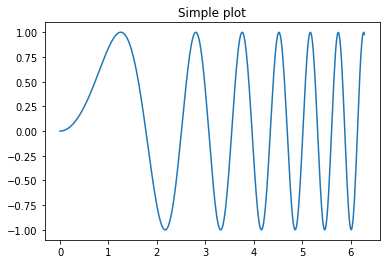

In [7]:
f, ax = plt.subplots()
ax.set_title('Simple plot')
ax.plot(x, y)
plt.show()

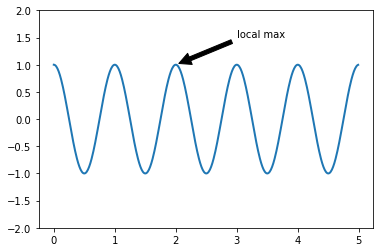

In [8]:
ax = plt.subplot(111)

t = np.arange(0.0, 5.0, 0.01)
s = np.cos(2*np.pi*t)
line, = plt.plot(t, s, lw=2)

plt.annotate('local max', xy=(2, 1), xytext=(3, 1.5),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )

plt.ylim(-2,2)
plt.show()

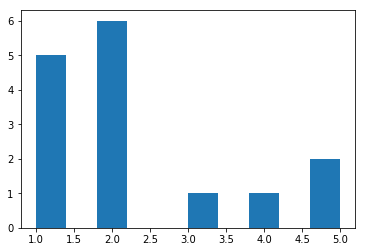

In [9]:
A = np.array([1,np.nan, 3,5,1,2,5,2,4,1,2,np.nan,2,1,np.nan,2,np.nan,1,2])
plt.figure()
plt.hist(A[~np.isnan(A)]) #,bins=5)
plt.show()

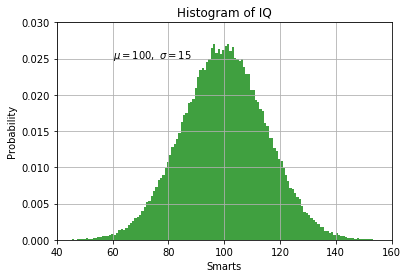

In [10]:
mu, sigma = 100, 15
xh = mu + sigma * np.random.randn(100000)

# the histogram of the data
n, bins, patches = plt.hist(xh, 150, normed=1, facecolor='g', alpha=0.75)


plt.xlabel('Smarts')
plt.ylabel('Probability')
plt.title('Histogram of IQ')
plt.text(60, .025, '$\mu=100,\ \sigma=15$')
plt.axis([40, 160, 0, 0.03])
plt.grid(True)
plt.show()

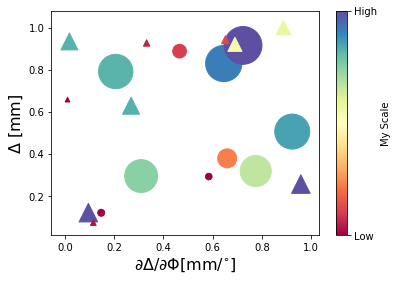

In [11]:
data = np.random.random((10, 4))
data2 = np.random.random((10, 4))

plt.subplots_adjust(bottom = 0.1)
plt.xlabel('$\partial \Delta/\partial\Phi[$mm$/^{\circ}]$', fontsize = 16)
plt.ylabel('$\Delta$ [mm]', fontsize = 16)

plt.scatter(data[:, 0], data[:, 1], marker = 'o', c = data[:, 3], s = data[:, 3]*1500,
            cmap = plt.cm.Spectral, vmin = min(data[:, 3]), vmax = max(data[:, 3]))
plt.scatter(data2[:, 0], data2[:, 1], marker = '^', c = data2[:, 2], s = data2[:, 2]*500,
            cmap = plt.cm.Spectral, vmin = min(data2[:, 2]), vmax = max(data2[:, 2]))

cbar = plt.colorbar(ticks = [min(data2[:, 2]), max(data2[:, 2])])
cbar.ax.set_yticklabels(['Low', 'High'])
cbar.set_label(r'My Scale')
plt.show()

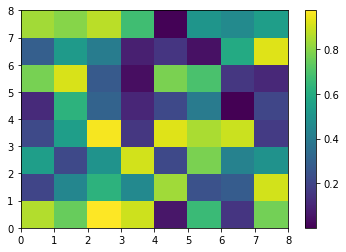

In [12]:
a = np.random.random((8,8))
#a = np.arange(64).reshape(8,8)
p = plt.pcolor(a)
plt.colorbar()
plt.show()

Two subplots, the axes array is 1-d

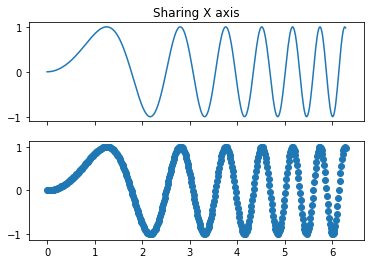

In [13]:
f, axarr = plt.subplots(2, sharex=True)
axarr[0].plot(x, y)
axarr[0].set_title('Sharing X axis')
axarr[1].scatter(x, y)
plt.show()

Two subplots, unpack the axes array immediately

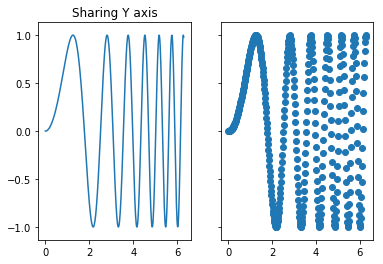

In [14]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.plot(x, y)
ax1.set_title('Sharing Y axis')
ax2.scatter(x, y)
plt.show()

Three subplots sharing both x/y axes

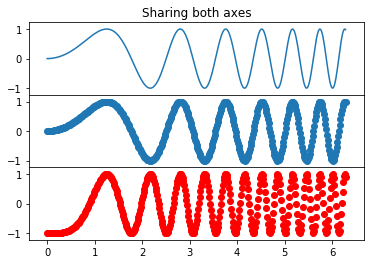

In [15]:
f, (ax1, ax2, ax3) = plt.subplots(3, sharex=True, sharey=True)
ax1.plot(x, y)
ax1.set_title('Sharing both axes')
ax2.scatter(x, y)
ax3.scatter(x, 2 * y ** 2 - 1, color='r')
#Fine-tune figure; make subplots close to each other and hide x ticks for all but bottom plot.
f.subplots_adjust(hspace=0)
plt.setp([a.get_xticklabels() for a in f.axes[:-1]], visible=False)
plt.show()

row and column sharing

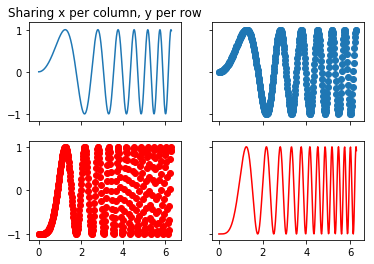

In [16]:
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex='col', sharey='row')
ax1.plot(x, y)
ax1.set_title('Sharing x per column, y per row')
ax2.scatter(x, y)
ax3.scatter(x, 2 * y ** 2 - 1, color='r')
ax4.plot(x, 2 * y ** 2 - 1, color='r')

Four axes, returned as a 2-d array

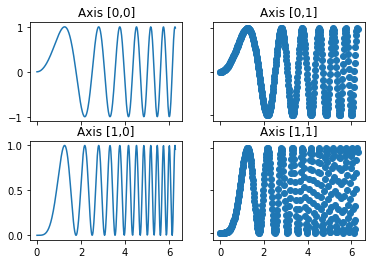

In [17]:
f, axarr = plt.subplots(2, 2)
axarr[0, 0].plot(x, y)
axarr[0, 0].set_title('Axis [0,0]')
axarr[0, 1].scatter(x, y)
axarr[0, 1].set_title('Axis [0,1]')
axarr[1, 0].plot(x, y ** 2)
axarr[1, 0].set_title('Axis [1,0]')
axarr[1, 1].scatter(x, y ** 2)
axarr[1, 1].set_title('Axis [1,1]')
#Fine-tune figure; hide x ticks for top plots and y ticks for right plots
plt.setp([a.get_xticklabels() for a in axarr[0, :]], visible=False)
plt.setp([a.get_yticklabels() for a in axarr[:, 1]], visible=False)
plt.show()

Four polar axes

### [Bokeh](https://bokeh.pydata.org/en/latest/)

[1](https://towardsdatascience.com/data-visualization-with-bokeh-in-python-part-one-getting-started-a11655a467d4)
[2](https://github.com/WillKoehrsen/Bokeh-Python-Visualization/blob/master/intro/exploration/first_histogram.ipynb)

In [36]:
from bokeh.plotting import figure
from bokeh.io import show, output_notebook, curdoc
from bokeh.models import ColumnDataSource, HoverTool, Panel, Tabs, CheckboxGroup, CategoricalColorMapper
from bokeh.layouts import row, widgetbox
from bokeh.palettes import Category10_5, Category20_16

In [31]:
# Create a blank figure with labels
p = figure(plot_width = 600, plot_height = 600, 
           title = 'Example Glyphs',
           x_axis_label = 'X', y_axis_label = 'Y')

# Example data
squares_x = [1, 3, 4, 5, 8]
squares_y = [8, 7, 3, 1, 10]
circles_x = [9, 12, 4, 3, 15]
circles_y = [8, 4, 11, 6, 10]

# Add squares glyph
p.square(squares_x, squares_y, size = 12, color = 'navy', alpha = 0.6)
# Add circle glyph
p.circle(circles_x, circles_y, size = 12, color = 'red')

GlyphRenderer(id='48f6e745-34a7-424d-8353-52724fb3a808', ...)

In [32]:
# Set to output the plot in the notebook
output_notebook()
# Show the plot
show(p)

Loading BokehJS ...

In [33]:
flights = pd.read_csv('../datasets/CSVs/flights.csv', index_col=0)
flights.head()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
1,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,2013-01-01 05:00:00
2,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,2013-01-01 05:00:00
3,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,2013-01-01 05:00:00
4,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576,5,45,2013-01-01 05:00:00
5,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762,6,0,2013-01-01 06:00:00


In [40]:
sys.getsizeof(flights)

147428443

In [41]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 336776 entries, 1 to 336776
Data columns (total 19 columns):
year              336776 non-null int64
month             336776 non-null int64
day               336776 non-null int64
dep_time          328521 non-null float64
sched_dep_time    336776 non-null int64
dep_delay         328521 non-null float64
arr_time          328063 non-null float64
sched_arr_time    336776 non-null int64
arr_delay         327346 non-null float64
carrier           336776 non-null object
flight            336776 non-null int64
tailnum           334264 non-null object
origin            336776 non-null object
dest              336776 non-null object
air_time          327346 non-null float64
distance          336776 non-null int64
hour              336776 non-null int64
minute            336776 non-null int64
time_hour         336776 non-null object
dtypes: float64(5), int64(9), object(5)
memory usage: 51.4+ MB


In [43]:
flights['arr_delay'].describe()

count    327346.000000
mean          6.895377
std          44.633292
min         -86.000000
25%         -17.000000
50%          -5.000000
75%          14.000000
max        1272.000000
Name: arr_delay, dtype: float64

In [ ]:
if np.isnan(np.sum(flights['arr_delay'])):
    out_vec = out_vec[~numpy.isnan(flights['arr_delay'])]
    out_vec[out_vec > 709] = 709

In [45]:
# Bins will be five minutes in width, limit delays to [-2, +2] hours



In [47]:
flights['arr_delay']

1          11.0
2          20.0
3          33.0
4         -18.0
5         -25.0
6          12.0
7          19.0
8         -14.0
9          -8.0
10          8.0
11         -2.0
12         -3.0
13          7.0
14        -14.0
15         31.0
16         -4.0
17         -8.0
18         -7.0
19         12.0
20         -6.0
21         -8.0
22         16.0
23        -12.0
24         -8.0
25        -17.0
26         32.0
27         14.0
28          4.0
29        -21.0
30         -9.0
          ...  
336747    -24.0
336748     -9.0
336749    -31.0
336750     -2.0
336751    -30.0
336752    -30.0
336753     11.0
336754    -25.0
336755      3.0
336756    -23.0
336757    -16.0
336758    194.0
336759      8.0
336760      7.0
336761     57.0
336762    -21.0
336763     42.0
336764    130.0
336765     -8.0
336766    -17.0
336767    -20.0
336768    -16.0
336769      1.0
336770    -25.0
336771      NaN
336772      NaN
336773      NaN
336774      NaN
336775      NaN
336776      NaN
Name: arr_delay, Length: